In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

In [2]:
playerdf = pd.read_csv('Player.csv', index_col=0)

In [3]:
playerdf.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
-Andy Allanson,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
-Alan Ashby,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
-Alvin Davis,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
-Andre Dawson,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
-Andres Galarraga,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N


In [4]:
playerdf.shape 

(322, 20)

In [5]:
playerdf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 322 entries, -Andy Allanson to -Willie Wilson
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AtBat      322 non-null    int64  
 1   Hits       322 non-null    int64  
 2   HmRun      322 non-null    int64  
 3   Runs       322 non-null    int64  
 4   RBI        322 non-null    int64  
 5   Walks      322 non-null    int64  
 6   Years      322 non-null    int64  
 7   CAtBat     322 non-null    int64  
 8   CHits      322 non-null    int64  
 9   CHmRun     322 non-null    int64  
 10  CRuns      322 non-null    int64  
 11  CRBI       322 non-null    int64  
 12  CWalks     322 non-null    int64  
 13  League     322 non-null    object 
 14  Division   322 non-null    object 
 15  PutOuts    322 non-null    int64  
 16  Assists    322 non-null    int64  
 17  Errors     322 non-null    int64  
 18  Salary     263 non-null    float64
 19  NewLeague  322 non-null    obje

In [6]:
playerdf.isnull().sum()

AtBat         0
Hits          0
HmRun         0
Runs          0
RBI           0
Walks         0
Years         0
CAtBat        0
CHits         0
CHmRun        0
CRuns         0
CRBI          0
CWalks        0
League        0
Division      0
PutOuts       0
Assists       0
Errors        0
Salary       59
NewLeague     0
dtype: int64

In [7]:
playerdf.dropna(inplace=True)
playerdf.shape

(263, 20)

In [8]:
pd.set_option('precision', 2)
playerdf.describe()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary
count,263.00,263.00,263.00,263.00,263.00,263.00,263.00,263.00,263.00,263.00,263.00,263.00,263.00,263.00,263.00,263.00,263.00
mean,403.64,107.83,11.62,54.75,51.49,41.11,7.31,2657.54,722.19,69.24,361.22,330.42,260.27,290.71,118.76,8.59,535.93
std,147.31,45.13,8.76,25.54,25.88,21.72,4.79,2286.58,648.20,82.20,331.20,323.37,264.06,279.93,145.08,6.61,451.12
min,19.00,1.00,0.00,0.00,0.00,0.00,1.00,19.00,4.00,0.00,2.00,3.00,1.00,0.00,0.00,0.00,67.50
25%,282.50,71.50,5.00,33.50,30.00,23.00,4.00,842.50,212.00,15.00,105.50,95.00,71.00,113.50,8.00,3.00,190.00
50%,413.00,103.00,9.00,52.00,47.00,37.00,6.00,1931.00,516.00,40.00,250.00,230.00,174.00,224.00,45.00,7.00,425.00
75%,526.00,141.50,18.00,73.00,71.00,57.00,10.00,3890.50,1054.00,92.50,497.50,424.50,328.50,322.50,192.00,13.00,750.00
max,687.00,238.00,40.00,130.00,121.00,105.00,24.00,14053.00,4256.00,548.00,2165.00,1659.00,1566.00,1377.00,492.00,32.00,2460.00


In [9]:
playerdf.League.value_counts()

A    139
N    124
Name: League, dtype: int64

In [10]:
playerdf.Division.value_counts()

W    134
E    129
Name: Division, dtype: int64

In [11]:
playerdf.NewLeague.value_counts()

A    141
N    122
Name: NewLeague, dtype: int64

In [12]:
dummyCol = pd.get_dummies(playerdf[['League', 'Division', 'NewLeague']])
dummyCol.head(3)

,League_A,League_N,Division_E,Division_W,NewLeague_A,NewLeague_N
-Alan Ashby,0,1,0,1,0,1
-Alvin Davis,1,0,0,1,1,0
-Andre Dawson,0,1,1,0,0,1


In [13]:
dummyCol.info()

<class 'pandas.core.frame.DataFrame'>
Index: 263 entries, -Alan Ashby to -Willie Wilson
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   League_A     263 non-null    uint8
 1   League_N     263 non-null    uint8
 2   Division_E   263 non-null    uint8
 3   Division_W   263 non-null    uint8
 4   NewLeague_A  263 non-null    uint8
 5   NewLeague_N  263 non-null    uint8
dtypes: uint8(6)
memory usage: 3.6+ KB


In [14]:
XTemp = playerdf.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1)

In [15]:
X = pd.concat([XTemp, dummyCol[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)

In [16]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 263 entries, -Alan Ashby to -Willie Wilson
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   AtBat        263 non-null    int64
 1   Hits         263 non-null    int64
 2   HmRun        263 non-null    int64
 3   Runs         263 non-null    int64
 4   RBI          263 non-null    int64
 5   Walks        263 non-null    int64
 6   Years        263 non-null    int64
 7   CAtBat       263 non-null    int64
 8   CHits        263 non-null    int64
 9   CHmRun       263 non-null    int64
 10  CRuns        263 non-null    int64
 11  CRBI         263 non-null    int64
 12  CWalks       263 non-null    int64
 13  PutOuts      263 non-null    int64
 14  Assists      263 non-null    int64
 15  Errors       263 non-null    int64
 16  League_N     263 non-null    uint8
 17  Division_W   263 non-null    uint8
 18  NewLeague_N  263 non-null    uint8
dtypes: int64(16), uint8(3)
memory usag

In [17]:
y = playerdf.Salary

In [18]:
y.head()

-Alan Ashby          475.0
-Alvin Davis         480.0
-Andre Dawson        500.0
-Andres Galarraga     91.5
-Alfredo Griffin     750.0
Name: Salary, dtype: float64

In [20]:
alphas = 10**np.linspace(10,-2,100)*0.00001
ridge = Ridge()

In [21]:
coeffs = []

In [22]:
scaler = StandardScaler()
for a in alphas:
    ridge.set_params(alpha=a)
    ridge.fit(scaler.fit_transform(X), y)
    coeffs.append(ridge.coef_)

In [23]:
np.shape(coeffs)

(100, 19)

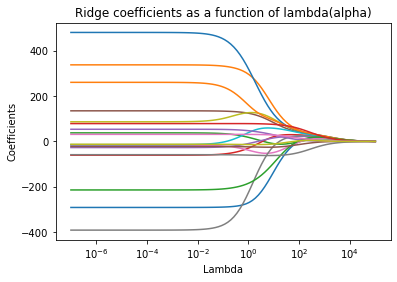

In [25]:
ax = plt.gca()
ax.plot(alphas, coeffs)
ax.set_xscale('log') 
plt.axis('tight') 
plt.xlabel('Lambda') 
plt.ylabel('Coefficients') 
plt.title('Ridge coefficients as a function of lambda(alpha)')
plt.show()

In [34]:
pd.set_option('precision', 6) 

In [35]:
X_train, X_test , y_train, y_test = model_selection.train_test_split(X,y, test_size=0.5, random_state=1)

In [38]:
def Ridge_Regression(alpha):
    scaler = StandardScaler()
    ridge = Ridge(alpha=alpha)
    ridge.fit(scaler.fit_transform(X_train), y_train)
    pred = ridge.predict(scaler.fit_transform(X_test))
    print(pd.Series(ridge.coef_, index=X.columns))
    print('Mean Squared Error: ',mean_squared_error(y_test, pred))

In [39]:
Ridge_Regression(0)

AtBat          -266.553048
Hits            197.706218
HmRun           -38.103182
Runs             -1.007996
RBI             103.119845
Walks            79.750209
Years            45.357697
CAtBat        -1399.811384
CHits          1426.954812
CHmRun          264.037977
CRuns            86.858781
CRBI           -211.142393
CWalks           42.533597
PutOuts         126.075563
Assists          65.816094
Errors          -38.313885
League_N         66.822855
Division_W      -56.870280
NewLeague_N     -40.962688
dtype: float64
Mean Squared Error:  117301.05503373897


In [40]:
Ridge_Regression(4)

AtBat         -210.807322
Hits           193.076932
HmRun          -51.437368
Runs             1.624070
RBI             81.458917
Walks           94.582539
Years          -28.029476
CAtBat        -117.924364
CHits           91.159632
CHmRun          91.762010
CRuns          101.115450
CRBI           117.598963
CWalks         -38.434685
PutOuts        125.556071
Assists         25.559188
Errors         -18.518904
League_N        35.792050
Division_W     -60.245442
NewLeague_N    -18.650623
dtype: float64
Mean Squared Error:  104835.06228323371


In [41]:
Ridge_Regression(100)

AtBat           3.911359
Hits           36.096360
HmRun           1.736680
Runs           19.611659
RBI            32.219132
Walks          43.972410
Years           8.496447
CAtBat         17.992839
CHits          32.545056
CHmRun         41.512925
CRuns          33.271936
CRBI           41.571334
CWalks         25.535833
PutOuts        75.761366
Assists        -2.475953
Errors         -0.792667
League_N        8.214298
Division_W    -41.608368
NewLeague_N     5.211955
dtype: float64
Mean Squared Error:  100357.25470322548


In [42]:
Ridge_Regression(10**10)

AtBat          2.526133e-06
Hits           2.826091e-06
HmRun          2.174902e-06
Runs           2.632138e-06
RBI            3.183658e-06
Walks          2.941154e-06
Years          2.478179e-06
CAtBat         3.213788e-06
CHits          3.432349e-06
CHmRun         3.435819e-06
CRuns          3.522298e-06
CRBI           3.602930e-06
CWalks         3.216811e-06
PutOuts        2.851209e-06
Assists       -4.856786e-08
Errors         1.736624e-07
League_N      -1.637144e-07
Division_W    -1.015188e-06
NewLeague_N   -1.325154e-07
dtype: float64
Mean Squared Error:  172862.2200557664


In [43]:
scaler = StandardScaler()

In [44]:
 ridgecv = RidgeCV(alphas=alphas)

In [45]:
ridgecv.fit(scaler.fit_transform(X_train), y_train)

RidgeCV(alphas=array([1.00000000e+05, 7.56463328e+04, 5.72236766e+04, 4.32876128e+04,
       3.27454916e+04, 2.47707636e+04, 1.87381742e+04, 1.41747416e+04,
       1.07226722e+04, 8.11130831e+03, 6.13590727e+03, 4.64158883e+03,
       3.51119173e+03, 2.65608778e+03, 2.00923300e+03, 1.51991108e+03,
       1.14975700e+03, 8.69749003e+02, 6.57933225e+02, 4.97702356e+02,
       3.76493581e+02, 2.84803587e+0...
       6.13590727e-05, 4.64158883e-05, 3.51119173e-05, 2.65608778e-05,
       2.00923300e-05, 1.51991108e-05, 1.14975700e-05, 8.69749003e-06,
       6.57933225e-06, 4.97702356e-06, 3.76493581e-06, 2.84803587e-06,
       2.15443469e-06, 1.62975083e-06, 1.23284674e-06, 9.32603347e-07,
       7.05480231e-07, 5.33669923e-07, 4.03701726e-07, 3.05385551e-07,
       2.31012970e-07, 1.74752840e-07, 1.32194115e-07, 1.00000000e-07]))

In [46]:
ridgecv.alpha_ 

70.54802310718645

In [47]:
scaler = StandardScaler()
ridgecv = RidgeCV(alphas=alphas, cv=5)
ridgecv.fit(scaler.fit_transform(X_train), y_train)
ridgecv.alpha_

93.26033468832199

In [48]:
scaler = StandardScaler()
ridgecv = RidgeCV(alphas=alphas, cv=10)
ridgecv.fit(scaler.fit_transform(X_train), y_train)
ridgecv.alpha_

215.44346900318826

In [49]:
scaler = StandardScaler()
opt_ridge = Ridge(alpha=ridgecv.alpha_) 
opt_ridge.fit(scaler.fit_transform(X_train), y_train) 
pred = opt_ridge.predict(scaler.fit_transform(X_test))
mean_squared_error(y_test, pred)

99927.59735966551

In [50]:
opt_ridge.fit(X, y)
pd.Series(opt_ridge.coef_, index=X.columns)

AtBat          -2.131693
Hits            7.609983
HmRun           2.357328
Runs           -1.956615
RBI            -0.149830
Walks           6.049360
Years          -1.913856
CAtBat         -0.181229
CHits           0.103239
CHmRun         -0.176791
CRuns           1.565492
CRBI            0.788984
CWalks         -0.787067
PutOuts         0.291609
Assists         0.379783
Errors         -2.890302
League_N        8.754551
Division_W    -26.039641
NewLeague_N     5.471489
dtype: float64

In [51]:
lasso = Lasso(max_iter=100000)
coefs = []
scaler = StandardScaler()

In [52]:
for a in alphas: 
    lasso.set_params(alpha=a) 
    lasso.fit(scaler.fit_transform(X_train), y_train) 
    coefs.append(lasso.coef_)

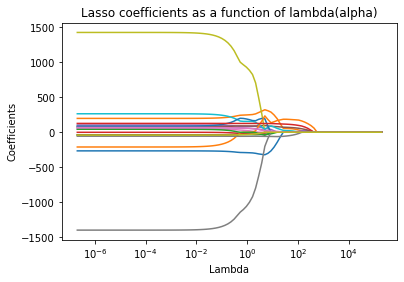

In [53]:
ax = plt.gca() 
ax.plot(alphas*2, coefs) 
ax.set_xscale('log') 
plt.axis('tight') 
plt.xlabel('Lambda') 
plt.ylabel('Coefficients') 
plt.title('Lasso coefficients as a function of lambda(alpha)'); 
plt.show()


In [54]:
lassocv = LassoCV(alphas=None, cv=10, max_iter=100000)

In [55]:
lassocv.fit(scaler.fit_transform(X_train), y_train)

LassoCV(cv=10, max_iter=100000)

In [56]:
lassocv.alpha_ 

27.503283261878394

In [57]:
lasso.set_params(alpha=lassocv.alpha_)

Lasso(alpha=27.503283261878394, max_iter=100000)

In [58]:
lasso.fit(scaler.fit_transform(X_train), y_train)

Lasso(alpha=27.503283261878394, max_iter=100000)

In [59]:
mean_squared_error(y_test, lasso.predict(scaler.fit_transform(X_test)))

106183.71692611946

In [60]:
pd.Series(lasso.coef_, index=X.columns)

AtBat            0.000000
Hits            50.246197
HmRun            0.000000
Runs             0.000000
RBI              0.000000
Walks           66.794424
Years            0.000000
CAtBat           0.000000
CHits            0.000000
CHmRun          19.441152
CRuns            0.000000
CRBI           181.336557
CWalks           0.000000
PutOuts        110.307327
Assists         -0.000000
Errors          -0.000000
League_N         0.000000
Division_W     -44.530872
NewLeague_N      0.000000
dtype: float64

In [61]:
pd.Series(lasso.coef_[lasso.coef_ !=0], index=X.columns[lasso.coef_ !=0])

Hits           50.246197
Walks          66.794424
CHmRun         19.441152
CRBI          181.336557
PutOuts       110.307327
Division_W    -44.530872
dtype: float64

In [62]:
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA 
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [63]:
pca = PCA()

In [64]:
X_pca_reduced = pca.fit_transform(scale(X))
print(pca.components_.shape)

(19, 19)


In [65]:
pd.DataFrame(pca.components_.T).loc[:4,:4]

,0,1,2,3,4
0,0.198290,-0.383784,0.088626,0.031967,0.028117
1,0.195861,-0.377271,0.074032,0.017982,-0.004652
2,0.204369,-0.237136,-0.216186,-0.235831,0.077660
3,0.198337,-0.377721,-0.017166,-0.049942,-0.038536
4,0.235174,-0.314531,-0.073085,-0.138985,0.024299


In [66]:
np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

array([38.31, 60.15, 70.84, 79.03, 84.29, 88.63, 92.26, 94.96, 96.28,
       97.25, 97.97, 98.64, 99.14, 99.46, 99.73, 99.88, 99.95, 99.98,
       99.99])

In [67]:
pca_t = PCA()
X_train_reduced_pca = pca_t.fit_transform(scale(X_train))
n= len(X_train_reduced_pca)
kfold10 = KFold(n_splits=10)
lm_regr = LinearRegression()
mse = []

In [68]:
tr_score = -1*cross_val_score(lm_regr, np.ones((n,1)),y_train, cv=kfold10,scoring='neg_mean_squared_error').mean()

In [69]:
mse.append(tr_score)

In [70]:
for i in np.arange(1, 20):
    tr_score = -1*cross_val_score(lm_regr, X_train_reduced_pca[:,:i], y_train, cv=kfold10, scoring='neg_mean_squared_error').mean()
    mse.append(tr_score)

[]

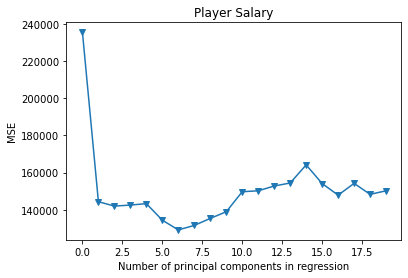

In [71]:
plt.plot(mse, '-v') 
plt.xlabel('Number of principal components in regression') 
plt.ylabel('MSE') 
plt.title('Player Salary') 
plt.xlim(xmin=-1); 
plt.plot()

In [72]:
mse_each_comp=pd.Series(np.array(mse).flatten(), index = np.arange(1,21)) 
mse_each_comp

1     235406.619100
2     144310.329851
3     141961.097915
4     142493.549431
5     143287.577720
6     134376.466736
7     129143.405002
8     131571.376294
9     135335.186049
10    138904.079492
11    149674.333623
12    150179.569822
13    152739.781510
14    154371.214873
15    164099.596798
16    154067.909113
17    147843.866699
18    154154.156968
19    148268.507015
20    150176.362589
dtype: float64